#**Data Load**

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
esg = pd.read_excel('/content/drive/MyDrive/esg_final_data.xlsx')
esg.head()

,Unnamed: 0,company,code,esg,e,s,g,AV,ret,sector,sector_class,AV_log,ret_group,sector_num,sector_count
0,0,BNK금융지주,138930,6,4,6,6,1.851312e+12,-0.000826,기타 금융업,금융 및 보험업,28.246916,1,2,83
1,1,DGB금융지주,139130,6,5,6,6,1.148500e+12,0.000187,기타 금융업,금융 및 보험업,27.769478,2,2,83
2,2,JB금융지주,175330,6,5,5,6,1.110984e+12,0.000460,기타 금융업,금융 및 보험업,27.736267,2,2,83
3,3,KB금융,105560,6,6,6,6,1.804606e+13,0.000152,기타 금융업,금융 및 보험업,30.523949,2,2,83
4,4,S-Oil,10950,6,5,6,6,7.790729e+12,-0.000677,석유 정제품 제조업,제조업,29.683956,1,9,314


In [5]:
sector_class = esg['sector_class'].unique()
print(len(sector_class))
print(sector_class)

9
['금융 및 보험업' '제조업' '전문, 과학 및 기술 서비스업' '정보통신업' '도매 및 소매업' '운수 및 창고업' '건설업'
 '전기, 가스, 증기 및 공기 조절 공급업' '사업시설 관리, 사업 지원 및 임대 서비스업']


#**Dummy variable 작업**

In [6]:
esg_dummy = pd.get_dummies(esg['sector_num'], prefix='sector', drop_first=True)
esg_dummy.head()

,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1


In [87]:
esg_revise= pd.merge(esg, esg_dummy,left_on=esg.index, right_index=True)
esg_revise.head()

,key_0,Unnamed: 0,company,code,esg,e,s,g,AV,ret,sector,sector_class,AV_log,ret_group,sector_num,sector_count,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9
0,0,0,BNK금융지주,138930,6,4,6,6,1.851312e+12,-0.000826,기타 금융업,금융 및 보험업,28.246916,1,2,83,1,0,0,0,0,0,0,0
1,1,1,DGB금융지주,139130,6,5,6,6,1.148500e+12,0.000187,기타 금융업,금융 및 보험업,27.769478,2,2,83,1,0,0,0,0,0,0,0
2,2,2,JB금융지주,175330,6,5,5,6,1.110984e+12,0.000460,기타 금융업,금융 및 보험업,27.736267,2,2,83,1,0,0,0,0,0,0,0
3,3,3,KB금융,105560,6,6,6,6,1.804606e+13,0.000152,기타 금융업,금융 및 보험업,30.523949,2,2,83,1,0,0,0,0,0,0,0
4,4,4,S-Oil,10950,6,5,6,6,7.790729e+12,-0.000677,석유 정제품 제조업,제조업,29.683956,1,9,314,0,0,0,0,0,0,0,1


In [88]:
del esg_revise['key_0']
del esg_revise['Unnamed: 0']
esg_revise.head()

,company,code,esg,e,s,g,AV,ret,sector,sector_class,AV_log,ret_group,sector_num,sector_count,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9
0,BNK금융지주,138930,6,4,6,6,1.851312e+12,-0.000826,기타 금융업,금융 및 보험업,28.246916,1,2,83,1,0,0,0,0,0,0,0
1,DGB금융지주,139130,6,5,6,6,1.148500e+12,0.000187,기타 금융업,금융 및 보험업,27.769478,2,2,83,1,0,0,0,0,0,0,0
2,JB금융지주,175330,6,5,5,6,1.110984e+12,0.000460,기타 금융업,금융 및 보험업,27.736267,2,2,83,1,0,0,0,0,0,0,0
3,KB금융,105560,6,6,6,6,1.804606e+13,0.000152,기타 금융업,금융 및 보험업,30.523949,2,2,83,1,0,0,0,0,0,0,0
4,S-Oil,10950,6,5,6,6,7.790729e+12,-0.000677,석유 정제품 제조업,제조업,29.683956,1,9,314,0,0,0,0,0,0,0,1


#**PCA**

In [28]:
esg_ = esg_revise.copy()

del esg_['company']
del esg_['code']
del esg_['AV']
del esg_['sector']
del esg_['sector_class']
del esg_['sector_count']
del esg_['ret_group']
del esg_['sector_num']

esg_=esg_.dropna()
esg_.head()

,esg,e,s,g,ret,AV_log,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9
0,6,4,6,6,-0.000826,28.246916,1,0,0,0,0,0,0,0
1,6,5,6,6,0.000187,27.769478,1,0,0,0,0,0,0,0
2,6,5,5,6,0.000460,27.736267,1,0,0,0,0,0,0,0
3,6,6,6,6,0.000152,30.523949,1,0,0,0,0,0,0,0
4,6,5,6,6,-0.000677,29.683956,0,0,0,0,0,0,0,1


In [29]:
tickers = ['esg','e','s','g','ret','AV_log','sector_2','sector_3', 'sector_4', 'sector_5',
       'sector_6', 'sector_7', 'sector_8', 'sector_9']

In [11]:
df = esg_.apply(lambda x: (x-x.mean())/x.std()) #standard scaling
df_corr = df.head().corr()

In [12]:
pca = PCA().fit(df)

In [13]:
pca.explained_variance_.sort()

In [14]:
pca.explained_variance_ratio_

array([0.2331183 , 0.129166  , 0.0875774 , 0.08102339, 0.07776613,
       0.07463024, 0.07401044, 0.07216396, 0.06703815, 0.03803677,
       0.03320048, 0.02538775, 0.00493221, 0.00194878])

In [15]:
np.cumsum(pca.explained_variance_ratio_)

array([0.2331183 , 0.36228429, 0.44986169, 0.53088509, 0.60865122,
       0.68328146, 0.7572919 , 0.82945586, 0.89649401, 0.93453078,
       0.96773126, 0.993119  , 0.99805122, 1.        ])

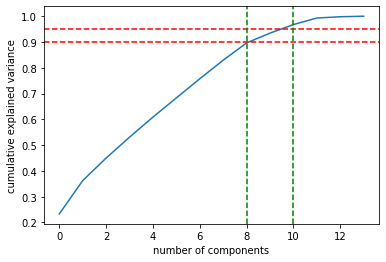

In [16]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(0.9, c='r', ls='--' )
plt.axhline(0.95, c='r', ls='--' )
plt.axvline(8, c='g', ls='--' )
plt.axvline(10, c='g', ls='--' )

In [17]:
pca_n = PCA(0.90).fit(df)
pca_n.n_components_

10

In [18]:
pca = PCA(n_components=10)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
print(pca.components_)

[[ 0.52401766  0.39109515  0.46837599  0.43301588 -0.05249395  0.37715626
   0.08144374 -0.03668745  0.0744453  -0.02693584 -0.03986123  0.02078352
  -0.00972287 -0.0648591 ]
 [-0.04960999 -0.33814604  0.04014453  0.09986698 -0.22285178  0.02535557
   0.39376997  0.093374    0.20887372  0.15584407  0.29294215  0.08270387
   0.06490142 -0.7019608 ]
 [-0.03637313 -0.10636511  0.0157154   0.04838107  0.55120235  0.31752218
  -0.40873875 -0.04590735 -0.10054832  0.06254081  0.60961342  0.11183323
   0.08174237 -0.07821901]
 [ 0.04978898  0.06590855 -0.06263386  0.08483658 -0.07260777 -0.20809925
  -0.55150572  0.03306165  0.663098    0.17550565 -0.18195861  0.24335056
   0.23287455 -0.10567818]
 [-0.03462073  0.14336747 -0.05989481 -0.03584507  0.16371742  0.01923416
   0.14465264 -0.03963    -0.40733558  0.12205095 -0.31072258  0.50724749
   0.60317727 -0.15879733]
 [ 0.01891304 -0.03374275  0.05653806  0.00235213  0.06095586  0.02220282
  -0.04546246 -0.07651853 -0.16219005  0.90643978 -

In [20]:
projected = pd.DataFrame(pca.fit_transform(df))
projected

,0,1,2,3,4,5,6,7,8,9
0,4.465054,1.702754,-1.557166,-1.227415,0.140440,-0.048709,-0.008790,-0.153475,-0.394143,-1.179499
1,4.615723,1.302750,-1.405606,-1.156322,0.342337,-0.044750,-0.046217,-0.182910,-0.163373,-1.170586
2,4.184362,1.230651,-1.337300,-1.108112,0.421413,-0.085446,-0.021110,-0.210346,-0.117694,-1.428650
3,5.588354,1.094288,-0.932017,-1.475640,0.482759,-0.032199,-0.097815,-0.029359,0.157125,-0.271933
4,4.750973,-1.069167,-0.303092,-0.039914,-0.443357,0.094481,0.031261,0.307422,-1.186005,-0.667517
...,...,...,...,...,...,...,...,...,...,...
554,-2.152627,-1.210372,-0.557309,0.123186,-0.065722,-0.127421,0.080616,-0.138787,-0.315424,-0.074171
555,-1.042159,-0.388040,-0.255654,-0.135612,-0.484398,0.021713,0.054609,-0.054796,-0.255354,-0.707909
556,-1.436150,-0.621743,0.127120,-0.370495,-0.342081,0.062063,-0.001331,-0.031249,0.369777,0.242276
557,-1.534736,-0.428635,-0.498101,-0.223599,-0.498643,-0.002067,0.057690,-0.030727,-0.314611,0.328484


In [21]:
print(df.shape, projected.shape)

(559, 14) (559, 10)


In [22]:
corrMat = pd.DataFrame([])

In [23]:
for j in range(10):
    tmp = j
    corrMat[tmp] = [np.corrcoef(projected.iloc[:,j],df[ticker])[0,1] for ticker in df.columns]

In [24]:
corrMat.index = tickers
corrMat

,0,1,2,3,4,5,6,7,8,9
esg,0.946669,-0.066713,-0.040275,0.053028,-0.036124,0.019332,0.018947,0.026010,-0.103257,-0.100185
e,0.706537,-0.454718,-0.117777,0.070196,0.149593,-0.034491,-0.015400,0.019317,-0.110407,0.253034
s,0.846149,0.053984,0.017401,-0.066708,-0.062495,0.057791,-0.038497,0.023092,0.059510,0.173812
g,0.782269,0.134295,0.053572,0.090355,-0.037401,0.002404,0.012979,-0.006655,-0.129718,-0.554571
ret,-0.094833,-0.299678,0.610339,-0.077331,0.170826,0.062307,-0.055952,-0.033760,0.630547,-0.178690
AV_log,0.681355,0.034097,0.351588,-0.221636,0.020069,0.022695,-0.023505,0.077858,0.228745,0.257177
sector_2,0.147133,0.529518,-0.452591,-0.587380,0.150933,-0.046470,-0.020089,-0.137123,0.286088,-0.042073
sector_3,-0.066278,0.125564,-0.050833,0.035212,-0.041351,-0.078215,0.124570,0.969460,0.095432,-0.025505
sector_4,0.134490,0.280881,-0.111336,0.706231,-0.425022,-0.165785,-0.062145,-0.149247,0.380550,0.081247
sector_5,-0.048661,0.209570,0.069251,0.186922,0.127350,0.926532,-0.152580,0.052075,-0.094298,0.034143


##### ***Biplot of Eigenvector***

In [25]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->', linewidth=1, shrinkA=0, shrinkB=0, ec='mediumblue')   
    ax.annotate("", v1, v0, arrowprops=arrowprops)

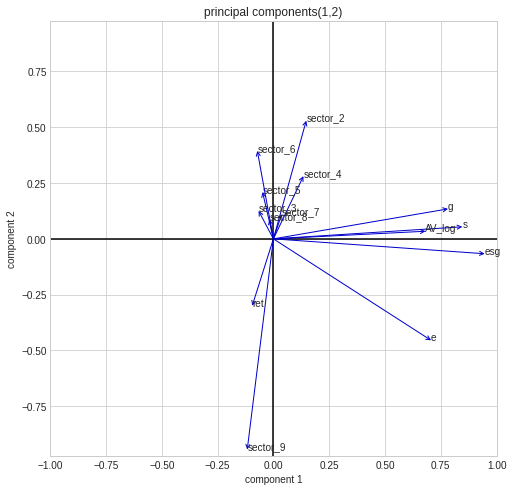

In [26]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(8 ,8))

for ticker in tickers:
    draw_vector([0, 0], corrMat.loc[ticker][:2], ax = ax)
    ax.text(float(corrMat.loc[ticker][:2][0]), float(corrMat.loc[ticker][:2][1]), ticker)

ax.axis('equal')
plt.axhline(y=0, c='k')  
plt.axvline(x=0, c='k')
ax.set(xlabel='component 1', ylabel='component 2',
          title='principal components(1,2)', 
      xlim=(-1., 1.), ylim=(-1., 1.));

#**Model1**

- sector, 시가총액 로그값, e, s, g 포함

In [155]:
tickers = ['e','s','g','ret','AV_log','sector_2','sector_3', 'sector_4', 'sector_5',
       'sector_6', 'sector_7', 'sector_8', 'sector_9']
esg_2 = esg_[tickers]

In [156]:
df = esg_2.apply(lambda x: (x-x.mean())/x.std())
df_corr = df.head().corr()

In [157]:
pca = PCA().fit(df)

In [158]:
pca.explained_variance_.sort()

In [159]:
pca.explained_variance_ratio_

array([0.18591116, 0.13836633, 0.09414268, 0.0869701 , 0.08360752,
       0.08033499, 0.07966625, 0.07764963, 0.07103842, 0.04031868,
       0.0326348 , 0.02725906, 0.00210039])

In [160]:
np.cumsum(pca.explained_variance_ratio_)

array([0.18591116, 0.32427749, 0.41842017, 0.50539027, 0.58899779,
       0.66933278, 0.74899903, 0.82664865, 0.89768708, 0.93800576,
       0.97064055, 0.99789961, 1.        ])

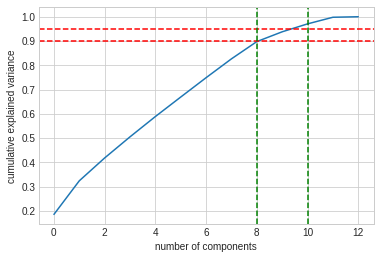

In [161]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(0.9, c='r', ls='--' )
plt.axhline(0.95, c='r', ls='--' )
plt.axvline(8, c='g', ls='--' )
plt.axvline(10, c='g', ls='--' )

In [162]:
pca_n = PCA(0.90).fit(df)
pca_n.n_components_

10

In [163]:
pca = PCA(n_components=10)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [164]:
print(pca.components_)

[[ 0.41066457  0.54958929  0.49145389 -0.05408166  0.48247289  0.14065745
  -0.04627155  0.09847296 -0.02913484 -0.02868668  0.03202974  0.003482
  -0.13319946]
 [-0.38308339 -0.02105443  0.04980571 -0.22547471 -0.03663321  0.37770987
   0.10172913  0.20154334  0.16264605  0.29844628  0.07956378  0.06280592
  -0.69188887]
 [-0.12260848 -0.00710037  0.038246    0.53918028  0.28469144 -0.43327436
  -0.03697099 -0.0850687   0.07484186  0.61937167  0.11512004  0.079
  -0.08150463]
 [ 0.09640412 -0.03849407  0.09556365 -0.06378307 -0.17968937 -0.51731631
   0.01739452  0.66235197  0.16193953 -0.23655072  0.26152606  0.2723694
  -0.11110805]
 [ 0.12455036 -0.07627538 -0.04901639  0.15989825  0.00771507  0.15738333
  -0.02614504 -0.46847496  0.13634563 -0.27580908  0.50466722  0.57686789
  -0.15359523]
 [-0.02941476  0.06901158  0.00689439  0.06870225  0.03293259 -0.04439385
  -0.09826938 -0.12716756  0.90857571 -0.18368929 -0.11864591 -0.29549384
   0.00870545]
 [-0.0133382  -0.02369986  0.0

In [165]:
projected = pd.DataFrame(pca.fit_transform(df), columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])
projected

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,3.603168,1.460124,-1.615386,-1.157397,0.183547,-0.061936,-0.024514,-0.178381,-0.359792,-1.074771
1,3.735274,1.043377,-1.473304,-1.066490,0.372336,-0.053336,-0.057660,-0.200464,-0.116703,-0.914598
2,3.229473,1.026382,-1.386030,-1.038842,0.465548,-0.104057,-0.043544,-0.239152,-0.010391,-1.135305
3,4.910743,0.690068,-1.070434,-1.312018,0.477914,-0.018502,-0.087065,-0.008392,0.058573,-0.276873
4,3.698145,-1.338673,-0.342997,-0.026363,-0.450997,0.094535,0.031917,0.294379,-1.347240,-0.881851
...,...,...,...,...,...,...,...,...,...,...
554,-2.167686,-1.008671,-0.501675,0.070200,-0.032898,-0.149817,0.054008,-0.174003,-0.206158,0.062594
555,-0.779760,-0.340052,-0.251617,-0.158246,-0.476404,0.026524,0.062378,-0.052316,-0.302574,-0.945665
556,-1.200083,-0.541032,0.122587,-0.388977,-0.325100,0.070267,0.011313,-0.014934,0.368067,0.070584
557,-1.338101,-0.321474,-0.478942,-0.261145,-0.473713,-0.005082,0.055800,-0.039030,-0.333091,0.125389


In [166]:
print(df.shape, projected.shape)

(559, 13) (559, 10)


In [167]:
corrMat = pd.DataFrame([])

In [168]:
for j in range(10):
    tmp = j
    corrMat[tmp] = [np.corrcoef(projected.iloc[:,j],df[ticker])[0,1] for ticker in df.columns]

In [169]:
corrMat.index = tickers
corrMat

,0,1,2,3,4,5,6,7,8,9
e,0.638428,-0.513784,-0.135639,0.102507,0.129849,-0.030060,-0.013574,0.022749,-0.151979,0.285997
s,0.854403,-0.028238,-0.007855,-0.040931,-0.079520,0.070525,-0.024119,0.038717,0.002536,0.158698
g,0.764024,0.066798,0.042311,0.101613,-0.051102,0.007046,0.018213,-0.002415,-0.166338,-0.597978
ret,-0.084076,-0.302402,0.596484,-0.067821,0.166701,0.070209,-0.044817,-0.015297,0.668552,-0.101173
AV_log,0.750062,-0.049132,0.314948,-0.191064,0.008043,0.033655,-0.011487,0.098265,0.167357,0.135158
sector_2,0.218669,0.506577,-0.479323,-0.550064,0.164079,-0.045368,-0.019957,-0.132905,0.312883,-0.011261
sector_3,-0.071935,0.136437,-0.040900,0.018496,-0.027257,-0.100425,0.097254,0.973086,0.056590,-0.014344
sector_4,0.153088,0.270306,-0.094110,0.704280,-0.488406,-0.129957,-0.037722,-0.116816,0.340296,0.076492
sector_5,-0.045294,0.218138,0.082796,0.172191,0.142146,0.928507,-0.107159,0.059590,-0.110225,0.033913
sector_6,-0.044597,0.400270,0.685198,-0.251525,-0.287543,-0.187719,-0.016889,-0.070168,-0.383691,0.101086


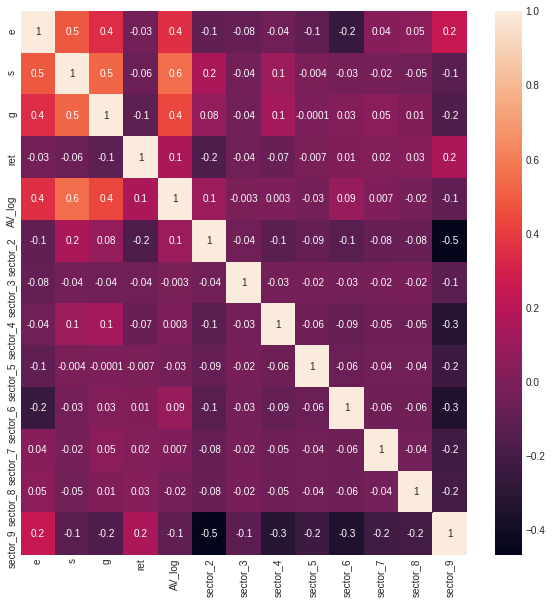

In [170]:
corr = esg_2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.1g')

Text(0.5, 1.0, 'e vs pc1')

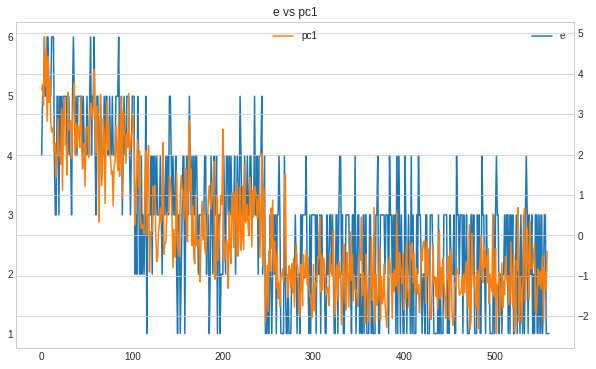

In [171]:
esg_2.e.plot(label='e',figsize = (10,6))
plt.legend(loc=8)
projected.pc1.plot(secondary_y=True, label='pc1')
plt.legend(loc=9)
plt.title('e vs pc1')

Text(0.5, 1.0, 's vs pc1')

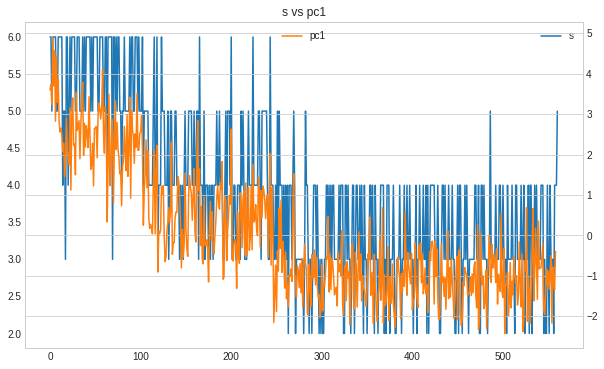

In [172]:
esg_2.s.plot(label='s',figsize = (10,6))
plt.legend(loc=8)
projected.pc1.plot(secondary_y=True, label='pc1')
plt.legend(loc=9)
plt.title('s vs pc1')

Text(0.5, 1.0, 'g vs pc1')

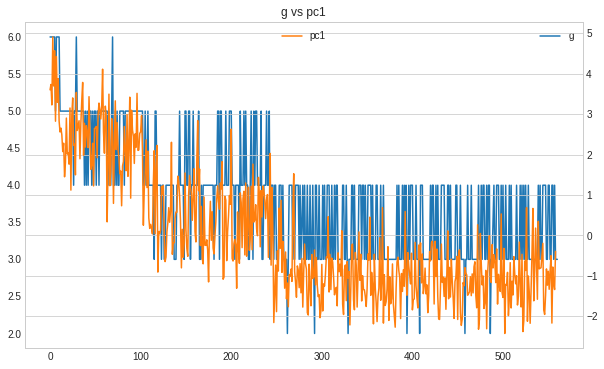

In [173]:
esg_2.g.plot(label='g',figsize = (10,6))
plt.legend(loc=8)
projected.pc1.plot(secondary_y=True, label='pc1')
plt.legend(loc=9)
plt.title('g vs pc1')

Text(0.5, 1.0, 'AV_log vs pc1')

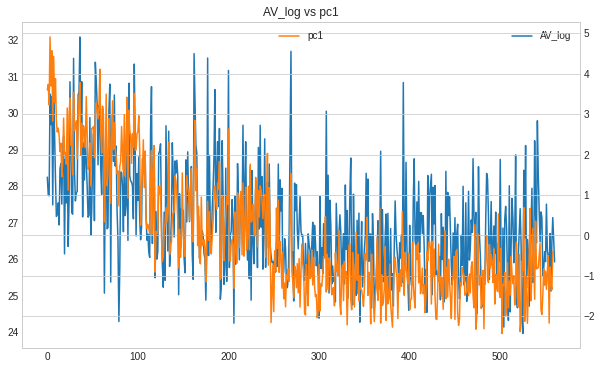

In [174]:
esg_2.AV_log.plot(label='AV_log',figsize = (10,6))
plt.legend(loc=8)
projected.pc1.plot(secondary_y=True, label='pc1')
plt.legend(loc=9)
plt.title('AV_log vs pc1')

Text(0.5, 1.0, 'ret vs pc1')

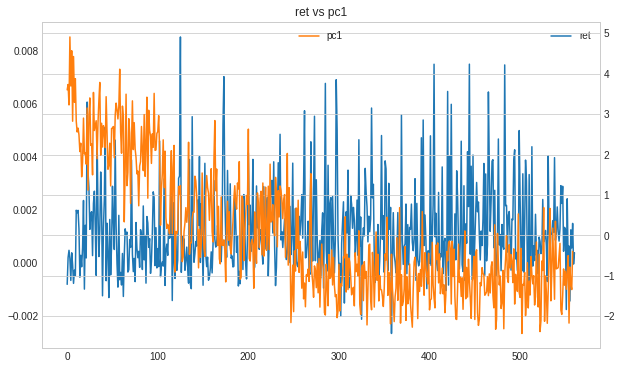

In [175]:
esg_2.ret.plot(label='ret',figsize = (10,6))
plt.legend(loc=8)
projected.pc1.plot(secondary_y=True, label='pc1')
plt.legend(loc=9)
plt.title('ret vs pc1')

Text(0.5, 1.0, 'ret vs pc2')

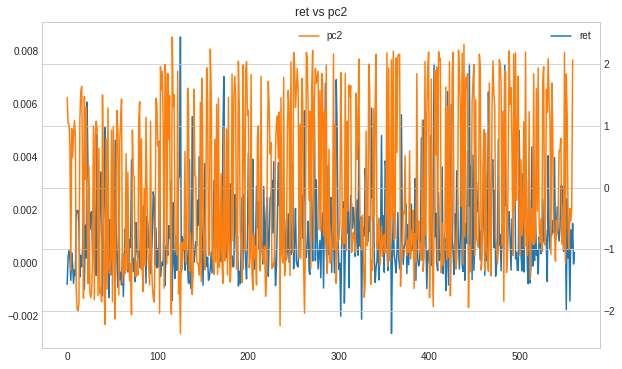

In [176]:
esg_2.ret.plot(label='ret',figsize = (10,6))
plt.legend(loc=8)
projected.pc2.plot(secondary_y=True, label='pc2')
plt.legend(loc=9)
plt.title('ret vs pc2')

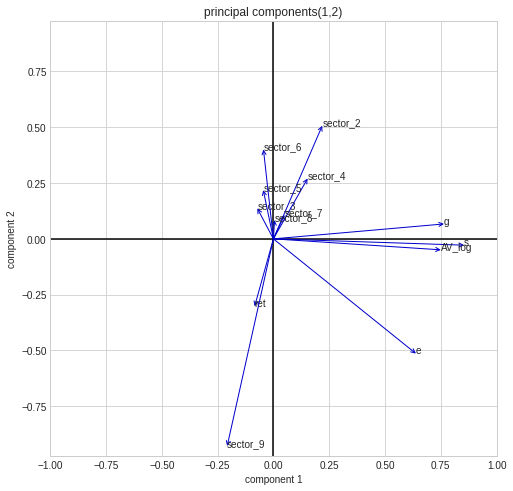

In [47]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(8 ,8))

for ticker in tickers:
    draw_vector([0, 0], corrMat.loc[ticker][:2], ax = ax)
    ax.text(float(corrMat.loc[ticker][:2][0]), float(corrMat.loc[ticker][:2][1]), ticker)

ax.axis('equal')
plt.axhline(y=0, c='k')  
plt.axvline(x=0, c='k')
ax.set(xlabel='component 1', ylabel='component 2',
          title='principal components(1,2)', 
      xlim=(-1., 1.), ylim=(-1., 1.));

#**Model2**

- sector 제외

In [119]:
tickers = ['e','s','g','ret','AV_log']
esg_3 = esg_[tickers]

In [120]:
df = esg_3.apply(lambda x: (x-x.mean())/x.std())
df_corr = df.head().corr()

In [121]:
pca = PCA().fit(df)

In [122]:
pca.explained_variance_.sort()

In [123]:
pca.explained_variance_ratio_

array([0.47305241, 0.21466636, 0.13364694, 0.10093527, 0.07769902])

In [124]:
np.cumsum(pca.explained_variance_ratio_)

array([0.47305241, 0.68771876, 0.82136571, 0.92230098, 1.        ])

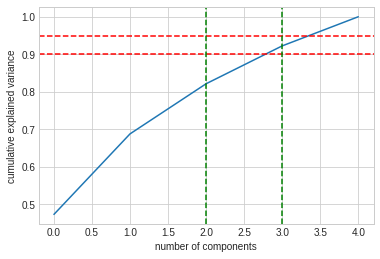

In [125]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(0.9, c='r', ls='--' )
plt.axhline(0.95, c='r', ls='--' )
plt.axvline(2, c='g', ls='--' )
plt.axvline(3, c='g', ls='--' )

In [126]:
pca_n = PCA(0.90).fit(df)
pca_n.n_components_

4

In [127]:
pca = PCA(n_components=4)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [128]:
print(pca.components_)

[[ 0.45560531  0.55286559  0.48925626 -0.02003259  0.49698134]
 [-0.04717612 -0.04599427 -0.17311755  0.93496832  0.30252851]
 [-0.8371312   0.02572901  0.4714254  -0.04202734  0.2730223 ]
 [-0.17633709  0.2205569  -0.6919604  -0.31539105  0.58478986]]


In [137]:
projected = pd.DataFrame(pca.fit_transform(df),columns=['pc1','pc2','pc3','pc4'])
projected

,pc1,pc2,pc3,pc4
0,3.142354,-1.493324,0.831992,-0.747046
1,3.324755,-1.061459,0.082774,-1.251959
2,2.821242,-0.876183,0.047328,-1.510804
3,4.559727,-0.577410,-0.068926,-0.336998
4,3.951153,-1.165391,0.442785,-0.365385
...,...,...,...,...
554,-1.991199,-0.129897,-0.954932,-0.419565
555,-0.670043,-0.467652,1.200796,0.028077
556,-1.062605,0.390760,0.719947,0.957932
557,-1.237263,-0.578134,0.652249,1.018173


In [138]:
print(df.shape, projected.shape)

(559, 5) (559, 4)


In [139]:
corrMat = pd.DataFrame([])

In [140]:
for j in range(4):
    tmp = j
    corrMat[tmp] = [np.corrcoef(projected.iloc[:,j],df[ticker])[0,1] for ticker in df.columns]

In [141]:
corrMat.index = tickers
corrMat

,0,1,2,3
e,0.700694,-0.048875,-0.684318,-0.125271
s,0.850275,-0.047651,0.021032,0.156685
g,0.752447,-0.179353,0.385370,-0.491573
ret,-0.030809,0.968643,-0.034356,-0.224056
AV_log,0.764328,0.313425,0.223184,0.415438


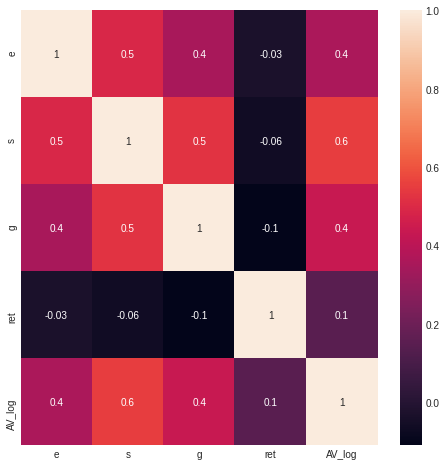

In [142]:
corr = esg_3.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, fmt='.1g')

Text(0.5, 1.0, 'e vs pc1')

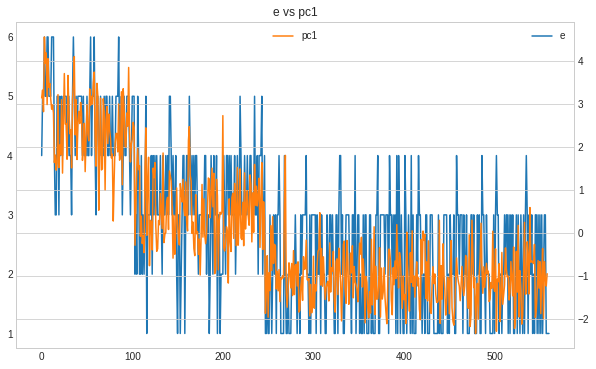

In [149]:
esg_3.e.plot(label='e',figsize = (10,6))
plt.legend(loc=8)
projected.pc1.plot(secondary_y=True, label='pc1')
plt.legend(loc=9)
plt.title('e vs pc1')

Text(0.5, 1.0, 's vs pc1')

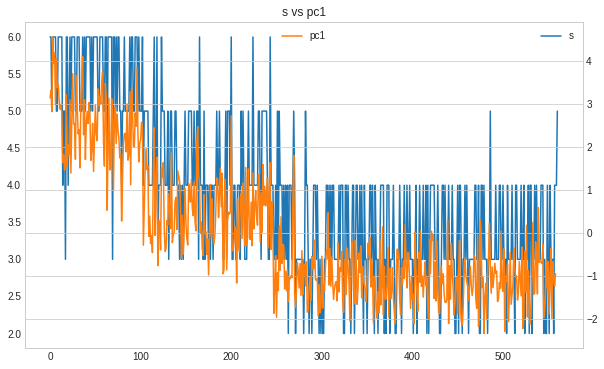

In [150]:
esg_3.s.plot(label='s',figsize = (10,6))
plt.legend(loc=8)
projected.pc1.plot(secondary_y=True, label='pc1')
plt.legend(loc=9)
plt.title('s vs pc1')

Text(0.5, 1.0, 'g vs pc1')

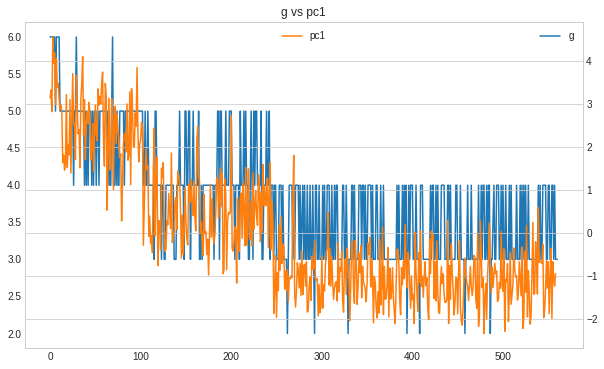

In [151]:
esg_3.g.plot(label='g',figsize = (10,6))
plt.legend(loc=8)
projected.pc1.plot(secondary_y=True, label='pc1')
plt.legend(loc=9)
plt.title('g vs pc1')

Text(0.5, 1.0, 'AV_log vs pc1')

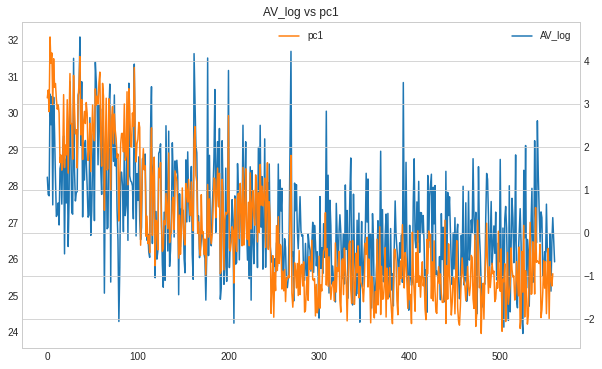

In [152]:
esg_3.AV_log.plot(label='AV_log',figsize = (10,6))
plt.legend(loc=8)
projected.pc1.plot(secondary_y=True, label='pc1')
plt.legend(loc=9)
plt.title('AV_log vs pc1')

Text(0.5, 1.0, 'ret vs pc1')

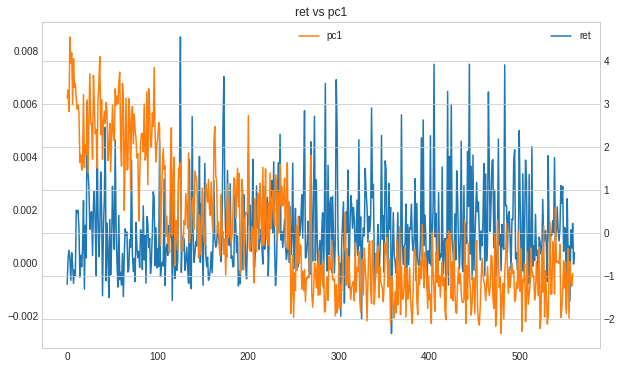

In [153]:
esg_3.ret.plot(label='ret',figsize = (10,6))
plt.legend(loc=8)
projected.pc1.plot(secondary_y=True, label='pc1')
plt.legend(loc=9)
plt.title('ret vs pc1')

Text(0.5, 1.0, 'ret vs pc2')

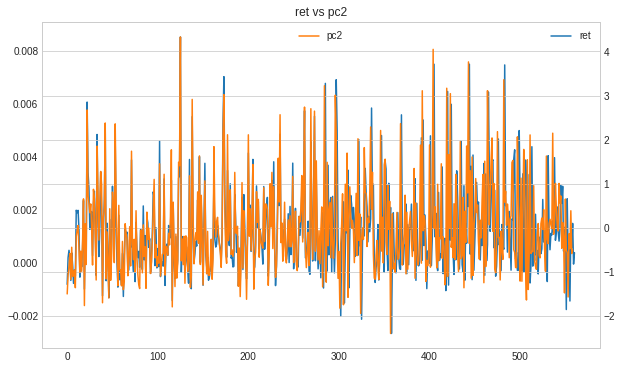

In [154]:
esg_3.ret.plot(label='ret',figsize = (10,6))
plt.legend(loc=8)
projected.pc2.plot(secondary_y=True, label='pc2')
plt.legend(loc=9)
plt.title('ret vs pc2')

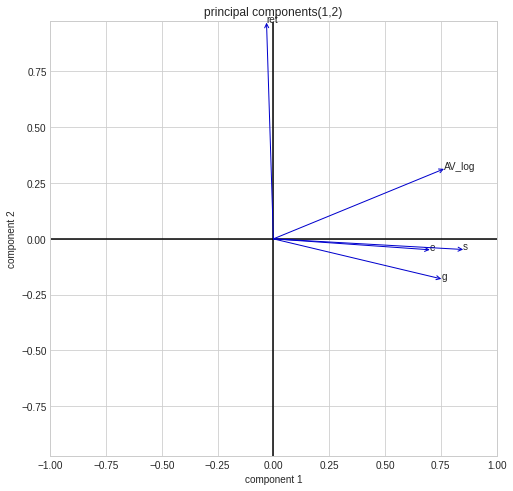

In [80]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(8 ,8))

for ticker in tickers:
    draw_vector([0, 0], corrMat.loc[ticker][:2], ax = ax)
    ax.text(float(corrMat.loc[ticker][:2][0]), float(corrMat.loc[ticker][:2][1]), ticker)

ax.axis('equal')
plt.axhline(y=0, c='k')  
plt.axvline(x=0, c='k')
ax.set(xlabel='component 1', ylabel='component 2',
          title='principal components(1,2)', 
      xlim=(-1., 1.), ylim=(-1., 1.));